In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *

## <font color=#2196f3>官网小例子</font>

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.172555,0.104952,0.963199,00:56


## <font color=#2196f3>视频教程</font>

### <font color=#2196f3>查看帮助文档</font>

In [3]:
# 查看帮助文档
#help(untar_data)
#doc(untar_data)
#cnn_learner??

# 显示下载网址
#URLs.PETS, URLs.MNIST_SAMPLE

### <font color=#2196f3>下载数据</font>

In [4]:
# 返回下载解压后的本地路径
path = untar_data(URLs.PETS)

# 显示路径文件夹的内容
path.ls()

[WindowsPath('C:/Users/caoyanjie/.fastai/data/oxford-iiit-pet/annotations'),
 WindowsPath('C:/Users/caoyanjie/.fastai/data/oxford-iiit-pet/images'),
 WindowsPath('C:/Users/caoyanjie/.fastai/data/oxford-iiit-pet/small-256'),
 WindowsPath('C:/Users/caoyanjie/.fastai/data/oxford-iiit-pet/small-96')]

In [5]:
# 构造路径
path_anno = path/'ammotations'
path_img = path/'images'

In [6]:
# 获取 path_img 内的所有文件（绝对路径）
fnames = get_image_files(path_img)
#fnames[:5]

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

### <font color=#2196f3>用 resnet34(34层神经网络) 训练</font>

In [8]:
# 构造数据、正则化
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\caoyanjie\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\caoyanjie\.fastai\data\oxford-iiit-pet\images;

Test: None

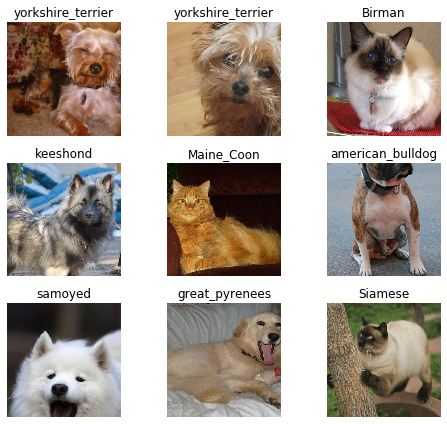

In [9]:
# 查看数据
data.show_batch(rows=3, figsize=(7, 6))

In [10]:
# 查看数据对应的标签
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [11]:
# 创建 learn，一个 learn 对象包含两部分，一是数据，二是模型
#learn = ConvLearner(data, models.resnet34, metrics=error_rate)   # 已弃用
#learn = create_cnn(data, models.resnet34, metrics=error_rate)    # 已弃用
learn = cnn_learner(data, models.resnet34, metrics=error_rate)    # Residual Network 残差网络，评价指标metrics

In [12]:
# 训练
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.422784,0.364128,0.115020,01:19
1,0.616171,0.296354,0.092693,01:20
2,0.383053,0.265770,0.079161,01:17
3,0.263108,0.246749,0.074425,01:18


In [13]:
# 保存模型
learn.save('stage-1')

### <font color=2196f3>可视化训练结果</font>

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

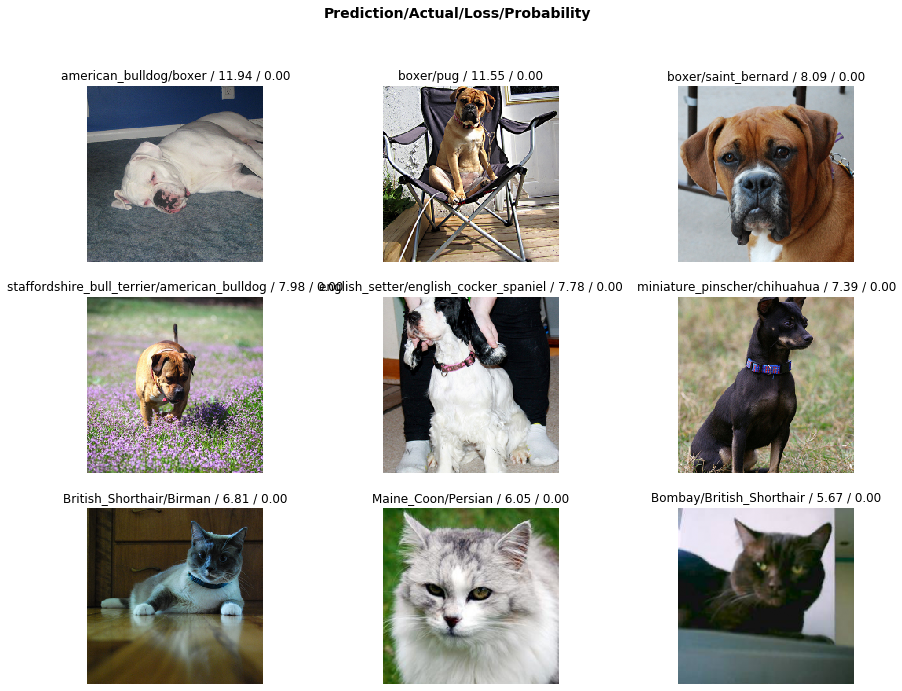

In [15]:
# 可视化最大损失，找到判断错误的样本
interp.plot_top_losses(9, figsize=(15, 11))

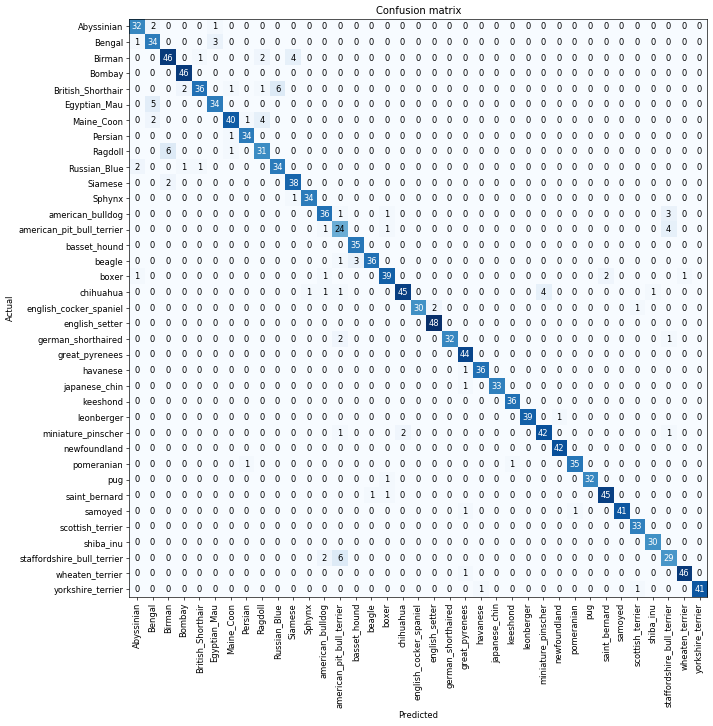

In [16]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Birman', 'Siamese', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Siamese', 'Birman', 2),
 ('boxer', 'saint_bernard', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

### <font color=#2196f3>不用迁移学习，重新训练</font>

In [18]:
# 训练整个模型（不用迁移学习）
learn.unfreeze()
learn.fit_one_cycle(1)  # 准确率会下降

epoch,train_loss,valid_loss,error_rate,time
0,0.711036,0.405160,0.120433,01:27


### <font color=#2196f3>优化模型，寻找训练时速度最快的学习率，调整参数</font>

In [19]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\caoyanjie\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\caoyanjie\.fastai\data\oxford-iiit-pet\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
   

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


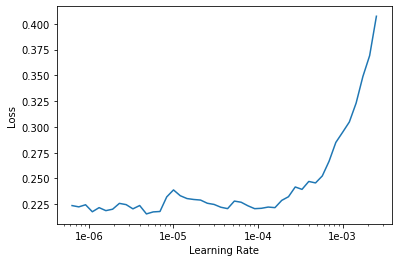

In [20]:
# 寻找训练神经网络时速度最快的学习率
learn.lr_find()

# 可视化寻找的结果
learn.recorder.plot()

In [21]:
learn.unfreeze()

# 调整参数，重新训练
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.249392,0.236035,0.071719,01:26
1,0.207095,0.228653,0.067659,01:27


### <font color=#2196f3>用 resnet50(50层神经网络) 训练</font>

In [22]:
# bs: batch size 一次性训练多少图像，如果显卡内存不足设置小一点，建议值：6G24，8G32，11G48，16G64
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=24)  
data.normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(5)
learn.save('stage-1-50')

epoch,train_loss,valid_loss,error_rate,time
0,0.711925,0.370983,0.107578,02:54
1,0.588972,0.317609,0.089986,02:46
2,0.387077,0.237106,0.066982,02:45
3,0.249344,0.218782,0.057510,02:45
4,0.199749,0.195285,0.058863,02:44


In [23]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.166813,0.193284,0.055480,03:30


In [24]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\caoyanjie\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
american_pit_bull_terrier,keeshond,beagle,english_setter,english_setter
Path: C:\Users\caoyanjie\.fastai\data\oxford-iiit-pet\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Co

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

In [26]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('american_bulldog', 'staffordshire_bull_terrier', 6),
 ('Ragdoll', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('american_bulldog', 'boxer', 3),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('basset_hound', 'american_pit_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('keeshond', 'leonberger', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

## <font color=#2196f3>加载数据的一些其他方法 Other data formats</font>

In [27]:
path = untar_data(URLs.MNIST_SAMPLE)
path

WindowsPath('C:/Users/caoyanjie/.fastai/data/mnist_sample')

In [28]:
path.ls()
(path/'train').ls()

[WindowsPath('C:/Users/caoyanjie/.fastai/data/mnist_sample/train/3'),
 WindowsPath('C:/Users/caoyanjie/.fastai/data/mnist_sample/train/7')]

### <font color=#2196f3>From folder</font>

In [29]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

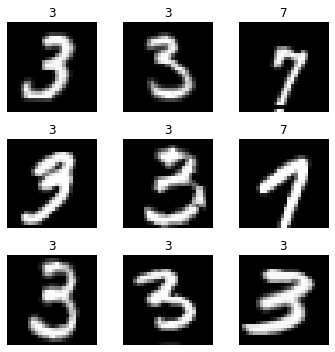

In [30]:
data.show_batch(rows=3, figsize=(5, 5))

In [31]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.185021,0.100972,0.959274,00:52
1,0.113930,0.052290,0.980373,00:51


### <font color=#2196f3>From csv</font>

In [32]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [33]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

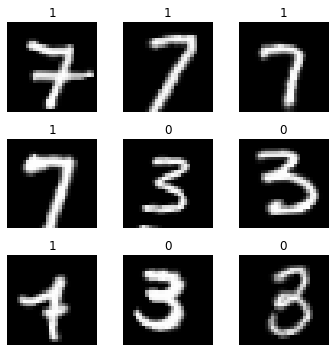

In [34]:
data.show_batch(rows=3, figsize=(5, 5))
data.classes

### <font color=#2196f3>From pandas</font>

In [35]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [36]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[WindowsPath('C:/Users/caoyanjie/.fastai/data/mnist_sample/train/3/7463.png'),
 WindowsPath('C:/Users/caoyanjie/.fastai/data/mnist_sample/train/3/21102.png')]

### <font color=#2196f3>From re</font>

In [37]:
pat = r'/(\d)/\d+\.png$'
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

### <font color=#2196f3>From func</font>

In [38]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24, label_func=lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['7']

### <font color=#2196f3>From lists</font>

In [39]:
labels = [('3') if '/3/' in str(x) else '7' for x in fn_paths]
labels[:5]

['7', '7', '7', '7', '7']

In [40]:
#data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=)
#learn2 = cnn_learner(data, tvm.resnet34, metrics=accuracy)
#learn2.fit_one_cycle(5)
#learn2.save('stage-2')
#interp = ClassificationInterpretation.from_learner(learn2)
#interp.most_confused(min_val=3)